## Exploratory Data Analysis

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 설정
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

### 데이터 로드

In [2]:
df = pd.read_csv('../../shared-data/merged-traffic.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (2012223, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


### 결측치 및 데이터 타입 확인

In [3]:
# 생략 없이 전체 컬럼을 출력하도록 설정
pd.set_option('display.max_rows', None)     # 모든 행 출력
pd.set_option('display.max_columns', None)  # 모든 열 출력
pd.set_option('display.width', None)        # 줄바꿈 없이 가로로 출력
pd.set_option('display.max_colwidth', None) # 컬럼 내 최대 문자 길이 제한 해제

print("Missing values (sorted):")
print(df.isnull().sum().sort_values(ascending=False))

print("Data types per column:")
print(df.dtypes)

pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")
pd.reset_option("display.width")
pd.reset_option("display.max_colwidth")

Missing values (sorted):
Flow Bytes/s                    1276
 Flow Duration                     0
 Destination Port                  0
 Total Backward Packets            0
Total Length of Fwd Packets        0
 Total Length of Bwd Packets       0
 Total Fwd Packets                 0
 Fwd Packet Length Max             0
 Fwd Packet Length Min             0
 Fwd Packet Length Std             0
 Fwd Packet Length Mean            0
Bwd Packet Length Max              0
 Bwd Packet Length Min             0
 Bwd Packet Length Mean            0
 Bwd Packet Length Std             0
 Flow Packets/s                    0
 Flow IAT Mean                     0
 Flow IAT Std                      0
 Flow IAT Max                      0
 Flow IAT Min                      0
Fwd IAT Total                      0
 Fwd IAT Mean                      0
 Fwd IAT Std                       0
 Fwd IAT Max                       0
 Fwd IAT Min                       0
Bwd IAT Total                      0
 Bwd IAT Mean

### 기본 통계량 출력

In [4]:
print("\nDescriptive statistics:")
display(df.describe(include='all'))


Descriptive statistics:


c:\Users\Admin\Desktop\security-engineer\Python\waap-ml-research\02-adaptive-traffic-classifier\venv\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\Admin\Desktop\security-engineer\Python\waap-ml-research\02-adaptive-traffic-classifier\venv\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,2.012223e+06,2.012223e+06,2.012223e+06,2.012223e+06,2.012223e+06,2.012223e+06,2.012223e+06,2.012223e+06,2.012223e+06,2.012223e+06,...,2.012223e+06,2.012223e+06,2.012223e+06,2.012223e+06,2.012223e+06,2.012223e+06,2.012223e+06,2.012223e+06,2.012223e+06,2012223
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BENIGN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1454613
mean,7.376622e+03,1.677692e+07,9.539253e+00,1.069633e+01,5.513227e+02,1.713984e+04,2.215724e+02,1.852412e+01,6.253659e+01,7.596901e+01,...,-2.908722e+03,8.789982e+04,4.052662e+04,1.581990e+05,6.500825e+04,1.041233e+07,6.381215e+05,1.089207e+07,9.923167e+06,NaN
std,1.742247e+04,3.539659e+07,7.616358e+02,1.017402e+03,5.738124e+03,2.305346e+06,8.014935e+02,6.802669e+01,2.106835e+02,3.204004e+02,...,1.255240e+06,6.798072e+05,3.945642e+05,1.038519e+06,6.122157e+05,2.663772e+07,5.302678e+06,2.745615e+07,2.637035e+07,NaN
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,5.300000e+01,1.640000e+02,1.000000e+00,1.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,8.000000e+01,3.808000e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.260000e+02,3.700000e+01,0.000000e+00,3.400000e+01,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
75%,4.430000e+02,5.251514e+06,5.000000e+00,5.000000e+00,2.910000e+02,8.600000e+02,1.890000e+02,3.500000e+01,5.000000e+01,3.979232e+01,...,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN


### 범주형/수치형 컬럼 분리

In [5]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nCategorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")


Categorical columns (1): [' Label']
Numerical columns (78): [' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST F

### 수치형 변수 분포 확인
- 너무 많은 데이터 출력으로 인한 생략

In [8]:
# for col in numerical_cols:
#     plt.figure()
#     sns.histplot(df[col].dropna(), kde=True, bins=50)
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
#     plt.show()

### 상관관계 시각화

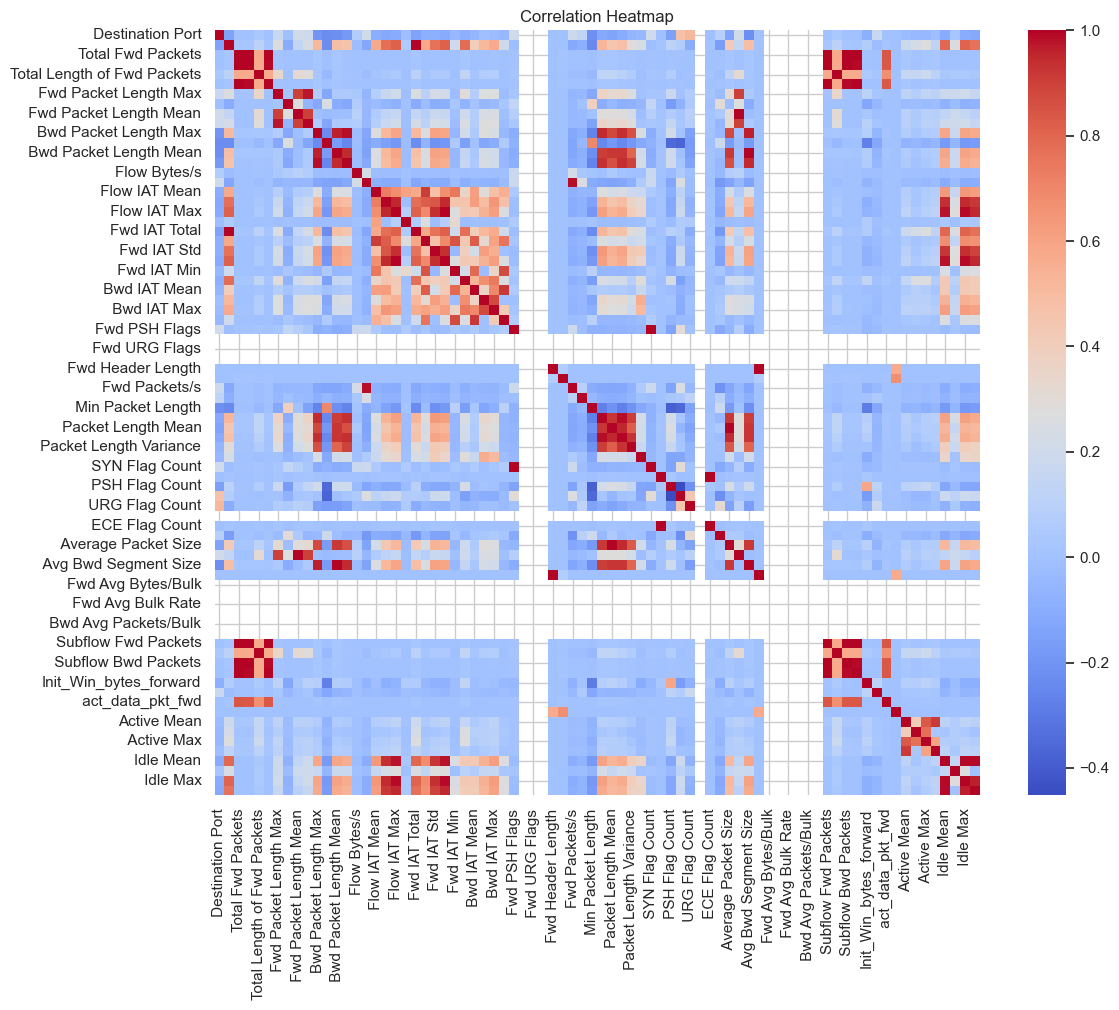

In [6]:
corr = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap="coolwarm", square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

### 범주형 변수 분포 확인 (상위 10개)

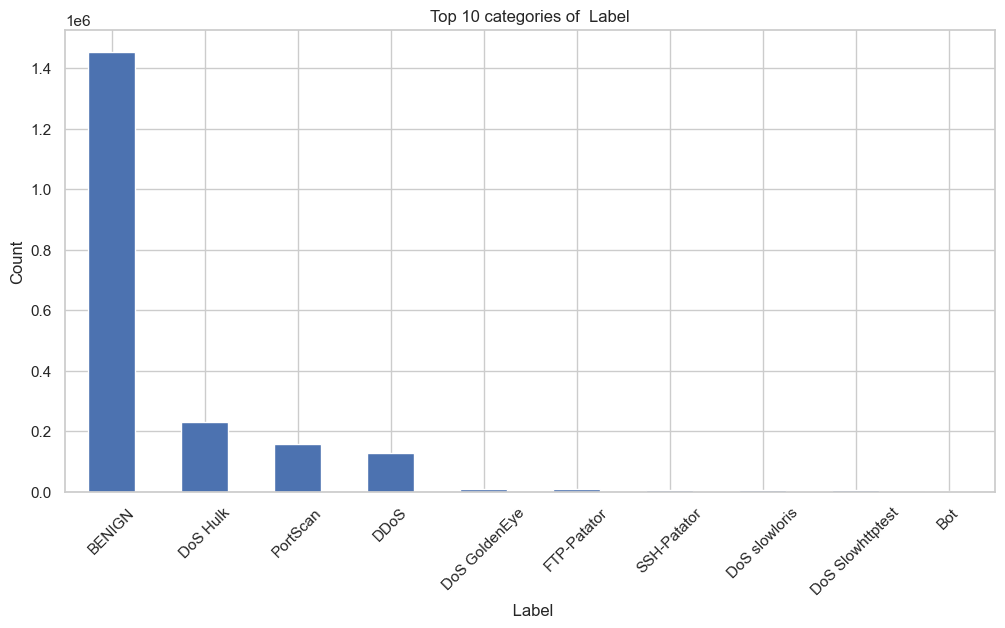

In [7]:
for col in categorical_cols:
    plt.figure()
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Top 10 categories of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()